# Morphological image processing (1)

In [1]:
import numpy as np
from skimage import io, img_as_float
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, binary_dilation, rectangle, disk, square, diamond
from skimage.morphology import dilation, erosion, opening, closing

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') #comment this line if axis ticks are needed

In [2]:
B = diamond(1)
print (B)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [3]:
A = np.zeros((6,6), dtype = np.uint8)
A[2:4,3:4] = 1
print (A)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [4]:
C = binary_dilation(A, B.astype(np.uint8)).astype(np.uint8)
print (C)

[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]


<Figure size 432x288 with 0 Axes>

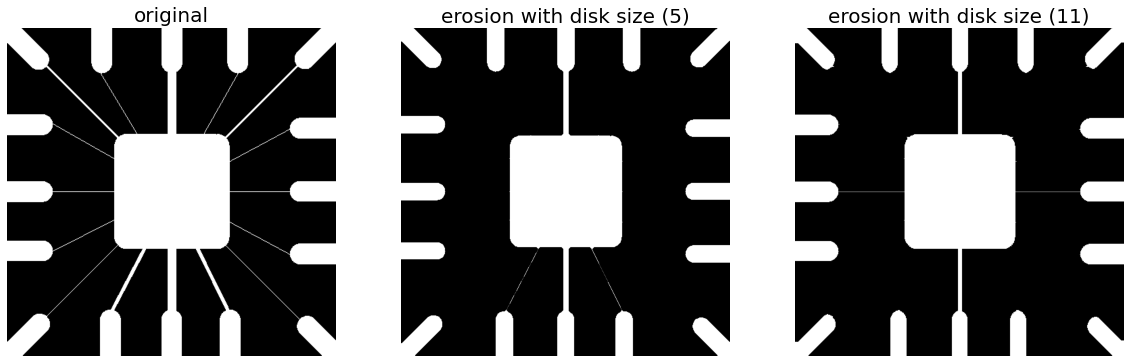

In [5]:
im = io.imread("images/circuitmask.tif")
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1),plot_image(im, 'original')
#im1 = binary_erosion(im, disk(3)) # a disk with radius 3
#im1 = binary_erosion(im, rectangle(1,5)) # a 1-by-5 rectangle
#im1 = binary_erosion(im, square(5)) # 5-by-5 square
im1 = binary_erosion(im, diamond(5)) # a diamond shape 
pylab.subplot(1,3,2),plot_image(im1, 'erosion with disk size (5)')
#im1 = binary_erosion(im, disk(5))
im1 = binary_erosion(im, rectangle(2,15))
pylab.subplot(1,3,3),plot_image(im1, 'erosion with disk size (11)')
pylab.show()


<Figure size 432x288 with 0 Axes>

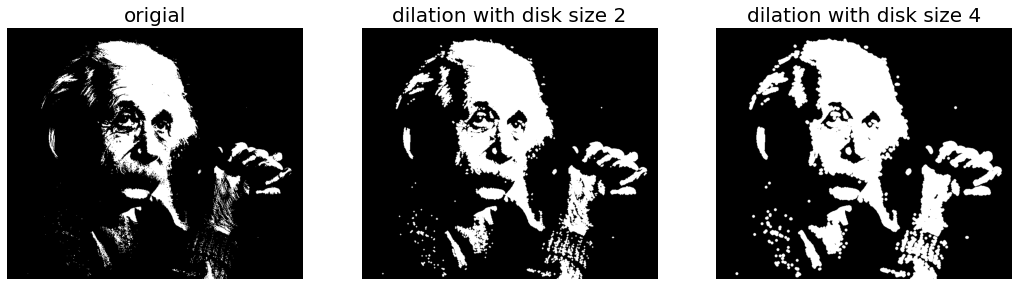

In [6]:
im = img_as_float(io.imread('images/einstein.tif'))
#im = 1 - im[...,1]
im[im<=0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('origial', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()

<Figure size 432x288 with 0 Axes>

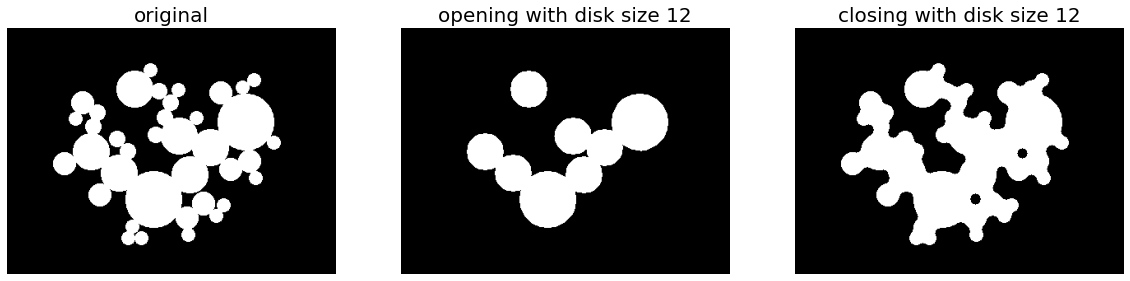

In [7]:
from skimage.morphology import binary_opening, binary_closing
im = io.imread('images/circles.png')
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1),plot_image(im, 'original')
im1 = binary_opening(im, disk(19))
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
im1 = binary_closing(im, disk(6))
pylab.subplot(1,3,3), plot_image(im1, 'closing with disk size ' + str(12))
pylab.show()

<Figure size 432x288 with 0 Axes>

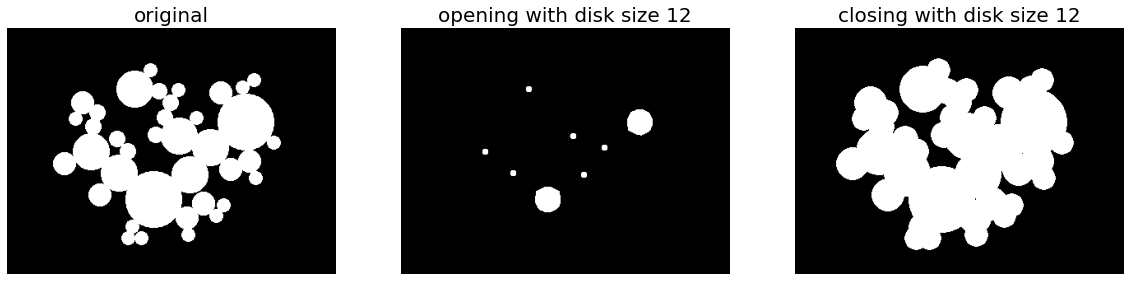

In [13]:
im = io.imread('images/circles.png')
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1),plot_image(im, 'original')
im1 = binary_erosion(im, disk(19))
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
im1 = binary_dilation(im, disk(6))
pylab.subplot(1,3,3), plot_image(im1, 'closing with disk size ' + str(12))
pylab.show()

<function matplotlib.pyplot.show(close=None, block=None)>

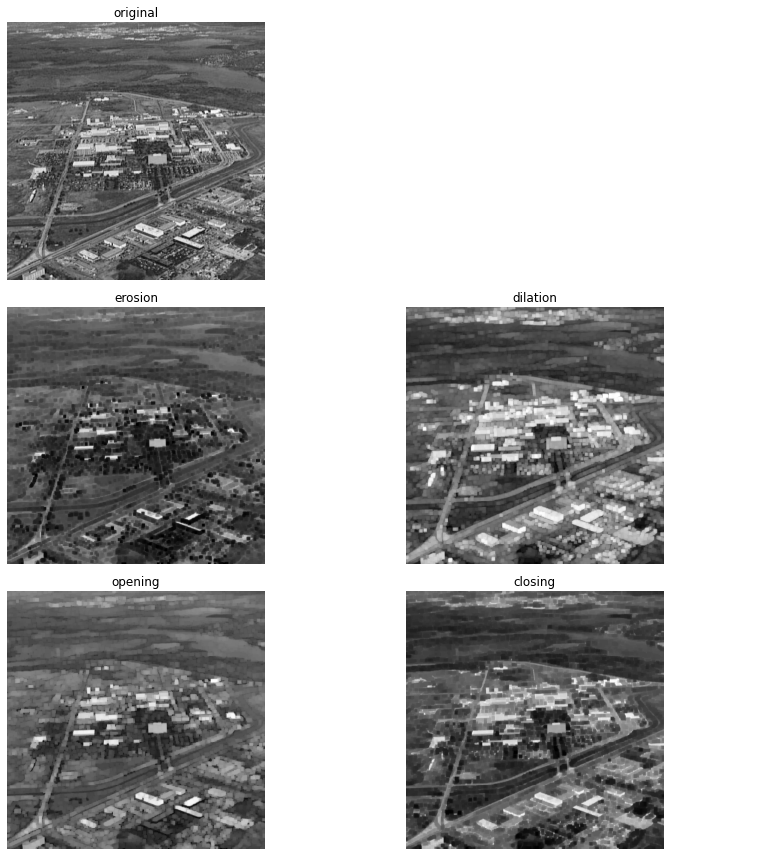

In [8]:
im = io.imread('images/aerial_view_no_turb.tif')
SE = square(5)
im_ero = erosion(im, SE)
im_dil = dilation(im, SE)
im_ope = opening(im, SE)
im_clo = closing(im, SE)

fig, axis = pylab.subplots(nrows=3, ncols=2, figsize=(12, 12), sharex=True, sharey=True)
axis[0,0].imshow(im, cmap='gray'), axis[0,0].set_title('original')
axis[1,0].imshow(im_ero, cmap='gray'),axis[1,0].set_title('erosion')
axis[1,1].imshow(im_dil, cmap='gray'),axis[1,1].set_title('dilation')
axis[2,0].imshow(im_ope, cmap='gray'), axis[2,0].set_title('opening')
axis[2,1].imshow(im_clo, cmap='gray'), axis[2,1].set_title('closing')


for ax in axis.ravel(): 
    ax.set_axis_off() 

pylab.tight_layout()
pylab.show